In [2]:
%load_ext autoreload
%autoreload 2

In [76]:
'''
Adapted from code by Ian Osband
https://github.com/iosband/ts_tutorial/

Run experiment on extrasensory data
Policy: uniform random, posterior sampling
'''

import os
import sys
import argparse

import numpy as np
import pandas as pd
import plotnine as gg

from base.experiment import BaseExperiment
from al.env_al import ContextualBanditFunctionalContext
from al.agent_rl import PolicyGradientREINFORCE, PolicyGradientActorCritic, UniformRandom
from al.env_al import normal_iid, sinewave, linear_classifier
from al.policy import PolicyNN, PolicyNNActorCritic

sys.path.append(os.getcwd())

In [77]:
##############################################################################
# Running a single experiment

true_theta = [1.0, 0.5]
n_steps = 1000
seed = 0
args = argparse.Namespace() # From https://stackoverflow.com/questions/16878315/what-is-the-right-way-to-treat-python-argparse-namespace-as-a-dictionary
args.n_feat = len(true_theta)
args.optim = 'adam' #'sgd'
args.learn_rate = 5e-3
args.momentum = 0.9 # only for SGD
args.gamma = 1 # discount factor
args.sample_cost = 2 # 0 <= cost
args.in_dim = 2 # input dim of policy
args.n_act = 2 # num actions

agent = PolicyGradientActorCritic(PolicyNNActorCritic, args) #UniformRandom(n_arm)
env = ContextualBanditFunctionalContext(normal_iid, true_theta, linear_classifier)
experiment = BaseExperiment(agent, env, n_steps=n_steps,
                            seed=seed, unique_id='example')

experiment.run_experiment()

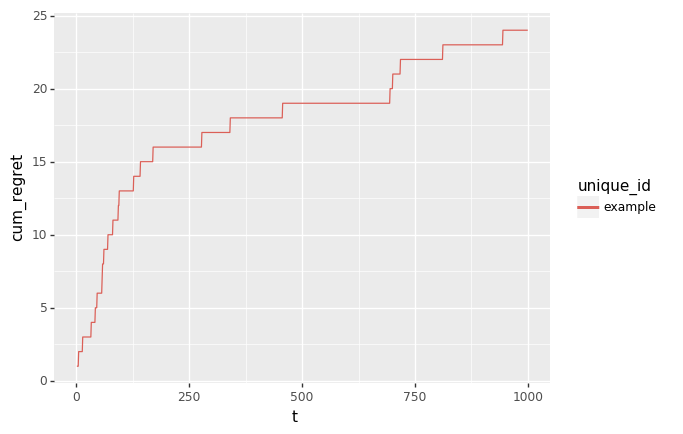

<ggplot: (-9223372029290870012)>
79 0.079


In [78]:
##############################################################################
# Simple display / plot of results

experiment.results.head()

p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='cum_regret', colour='unique_id')
     + gg.geom_line())
print(p)

print(env.num_query, env.num_query/n_steps)

In [36]:
experiment.results

,t,instant_regret,cum_regret,action,unique_id,instant_reward,cum_reward,num_query,logger
0,1,1.0,1.0,"(0, 0.0)",example,0.0,0.0,0,"[0.0, 0.0]"
1,2,1.0,2.0,"(1, 0.0)",example,0.0,0.0,1,"[0.0, 0.0]"
2,3,1.0,3.0,"(1, -1.0)",example,0.0,0.0,2,"[0.09235160607642703, 0.21144585103753286]"
3,4,0.0,3.0,"(0, 1.0)",example,1.0,1.0,2,"[0.27209750203632505, 0.11829006332219753]"
4,5,0.0,3.0,"(1, 1.0)",example,1.0,2.0,3,"[0.27209750203632505, 0.11829006332219753]"
...,...,...,...,...,...,...,...,...,...
9995,9996,0.0,63.0,"(0, 1.0)",example,1.0,9933.0,1716,"[6.796991767360236, 3.4838030608983916]"
9996,9997,0.0,63.0,"(0, 1.0)",example,1.0,9934.0,1716,"[6.796991767360236, 3.4838030608983916]"
9997,9998,0.0,63.0,"(0, -1.0)",example,1.0,9935.0,1716,"[6.796991767360236, 3.4838030608983916]"
9998,9999,0.0,63.0,"(0, -1.0)",example,1.0,9936.0,1716,"[6.796991767360236, 3.4838030608983916]"


In [12]:
agent.w_t

array([1.88939474, 0.84184241])

In [13]:
list(agent.policy.parameters())

[Parameter containing:
 tensor([[-0.2787, -0.5066],
         [ 0.5832,  0.5290]], requires_grad=True), Parameter containing:
 tensor([-0.1500, -0.5051], requires_grad=True), Parameter containing:
 tensor([[ 0.3234, -0.3129],
         [-0.0861, -0.5558]], requires_grad=True), Parameter containing:
 tensor([ 3.3597, -3.1324], requires_grad=True), Parameter containing:
 tensor([[-0.3166,  0.4822]], requires_grad=True), Parameter containing:
 tensor([8.3231e-07], requires_grad=True)]

In [56]:
a=[np.sin(2*np.pi*10*(ts-1)/1000) + np.random.normal(loc=0.0, scale=0.1) for ts in range(1000)]
a=pd.DataFrame({'x':range(1000),'y':a})
p = (gg.ggplot(a)
     + gg.aes(x='x', y='y')
     + gg.geom_line())
print(p)

In [77]:
np.append(np.array([1,2]),23)

array([ 1,  2, 23])